In this dataset we have to predict the sales price of  houses in King County, Seattle. It includes homes sold between May 2014 and May 2015.
Before doing anything we should first know about the dataset what it contains what are its features and what is the structure of data.

The dataset cantains **21** house features plus the price, along with **21615(17614+3999)** observations.

The description for the 20 features is given below: <br>

**1. id** :- It is the unique numeric  number assigned to each house being sold. <br>
**2. date** :- It is the date on which the house was sold out. <br>
**3. price**:- It is the price of house which we have to predict so this is our target variable and aprat from it are our features. <br>
**4. bedrooms** :- It determines number of bedrooms in a house. <br>
**5. bathrooms** :- It determines number of bathrooms in a bedroom of a house. <br>
**6. sqft_living** :- It is the measurement variable which determines the measurement of house in square foot. <br>
**7. sqft_lot** : It is also the measurement variable which determines  square foot of the lot. <br>
**8. floors**: It determines total floors means levels of house. <br>
**9. waterfront** : This feature determines whether a house has a view to waterfront 0 means no 1 means yes. <br>
**10. view** : This feature determines whether a house has been viewed or not  0 means no 1 means yes. <br>
**11. condition** : It determines the overall condition of a house on a scale of 1 to 5. <br>
**12. grade** : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11. <br>
**13. sqft_above** : It determines square footage of house apart from basement. <br>
**14. sqft_basement** : It determines square footage of the basement of the house. <br>
**15. yr_built** : It detrmines the date of building of the house. <br>
**16. yr_renovated** : It detrmines year of renovation of house. <br>
**17. zipcode**  : It determines the zipcode of the location of the house. <br>
**18. lat** : It determines the latitude of the location of the house. <br>
**19.  long** : It determines the longitude of the location of the house. <br>
**20. sqft_living15** : Living room area in 2015(implies-- some renovations)  <br>
**21. sqft_lot15** : lotSize area in 2015(implies-- some renovations) <br>

Step 1: Package import

In [1]:
# Package Import
from __future__ import division
import numpy as np
import pandas as pd
# import xgboost
import math
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn import linear_model

In [2]:
# Data Input
train = pd.read_csv("training_dataset.csv")
test = pd.read_csv("test_dataset.csv")

In [3]:
# First 5 rows of Data
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3787000140,20140901T000000,450000,3,2.25,1780,9969,1.0,0,0,...,8,1450,330,1985,0,98034,47.7286,-122.168,1950,7974
1,1934800078,20140930T000000,430000,2,2.25,1040,1516,2.0,0,0,...,8,1040,0,2008,0,98122,47.6037,-122.307,1560,1920
2,7331900290,20140731T000000,230000,4,1.50,1520,8800,1.0,0,0,...,7,1520,0,1960,0,98002,47.3136,-122.208,1370,8800
3,3438500798,20140715T000000,275000,3,1.50,1060,6954,1.0,0,0,...,6,1060,0,1983,0,98106,47.5498,-122.355,1560,6954
4,2697400020,20141031T000000,400000,3,2.00,1350,7216,1.0,0,0,...,7,1350,0,1964,0,98177,47.7616,-122.365,1920,7600


In [4]:
# First 5 rows of test data
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6825100015,20140604T000000,2,1.75,1500,6800,1.0,0,0,4,7,910,590,1942,0,98117,47.7004,-122.371,1450,6800
1,1698900195,20140902T000000,3,2.00,1880,3000,1.0,0,0,4,8,1040,840,1931,0,98109,47.6418,-122.351,1790,3000
2,2848700585,20150424T000000,1,1.00,810,5000,1.0,0,1,3,7,590,220,1936,0,98106,47.5696,-122.360,1920,5000
3,2597690050,20150409T000000,4,1.75,1770,7336,1.0,0,0,4,8,1770,0,1986,0,98058,47.4265,-122.163,2030,8183
4,8944600200,20140623T000000,3,2.50,1900,3255,2.0,0,0,3,8,1900,0,1988,2000,98007,47.6075,-122.147,1880,3350


In [5]:
# Bottom 5 rows of training data
train.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17609,2877103111,20140825T000000,585000,3,1.50,1670,5000,1.5,0,0,...,7,1670,0,1912,0,98117,47.6780,-122.360,1750,5000
17610,2525049148,20141007T000000,3418800,5,5.00,5450,20412,2.0,0,0,...,11,5450,0,2014,0,98039,47.6209,-122.237,3160,17825
17611,3782100035,20140813T000000,299000,3,1.00,960,8100,1.0,0,0,...,7,960,0,1955,0,98155,47.7763,-122.305,1080,8100
17612,6648100010,20141119T000000,392500,3,1.75,1540,8925,1.0,0,0,...,7,1540,0,1957,0,98133,47.7762,-122.337,1620,10397
17613,2946001550,20150416T000000,279000,6,1.75,2240,11180,2.0,0,0,...,7,2240,0,1955,0,98198,47.4200,-122.323,1590,7955


In [6]:
# Bottom 5 rows of test data
test.tail()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3994,2114700540,20141021T000000,3,2.50,1320,4320,1.0,0,0,3,6,660,660,1918,0,98106,47.5327,-122.347,1190,4200
3995,7697870600,20140909T000000,3,2.50,1520,7200,2.0,0,0,4,7,1520,0,1985,0,98030,47.3679,-122.182,1780,7210
3996,7888780090,20141121T000000,3,2.50,2100,6021,2.0,0,0,3,7,2100,0,1992,0,98023,47.2917,-122.375,2091,7547
3997,2125059013,20150420T000000,5,3.50,4320,40816,2.0,0,0,4,11,4320,0,1997,0,98004,47.6440,-122.185,4320,44584
3998,1624049293,20140506T000000,5,3.75,2890,5000,1.0,0,0,3,7,1310,1580,2006,0,98108,47.5701,-122.296,1930,5117


In [7]:
# Train Data Size
train.shape

(17614, 21)

In [8]:
train.groupby(['zipcode'],as_index=False)['zipcode'].agg({'cnt':'count'})

,zipcode,cnt
0,98001,301
1,98002,167
2,98003,229
3,98004,257
4,98005,140
...,...,...
65,98177,201
66,98178,217
67,98188,108
68,98198,224


In [9]:
# Test Data Size
test.shape

(3999, 20)

In [10]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.761400e+04,1.761400e+04,17614.000000,17614.000000,17614.000000,1.761400e+04,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000
mean,4.569068e+09,5.408514e+05,3.372431,2.113475,2080.915692,1.513310e+04,1.495856,0.007097,0.233848,3.409844,7.660100,1789.456398,291.459294,1970.917566,80.774384,98078.043204,47.560487,-122.214127,1985.633303,12680.009424
std,2.869570e+09,3.685506e+05,0.935641,0.773550,923.863759,4.194362e+04,0.540092,0.083944,0.765230,0.649949,1.179174,831.418845,443.419741,29.425821,393.288442,53.473239,0.138408,0.140161,685.581487,26713.761385
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.122052e+09,3.225000e+05,3.000000,1.500000,1420.000000,5.053250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471600,-122.328000,1480.000000,5100.000000
50%,3.904985e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.607000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572700,-122.230000,1840.000000,7600.000000
75%,7.300200e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.065000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10057.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
test.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000
mean,4.629782e+09,3.363841,2.120405,2075.424856,14991.852213,1.487497,0.009502,0.236309,3.407602,7.642661,1783.696674,291.728182,1971.390848,100.381595,98077.484371,47.558141,-122.212879,1990.60115,13158.026007
std,2.907023e+09,0.905159,0.755135,894.263460,39037.889544,0.539550,0.097028,0.771180,0.654306,1.158992,813.356912,438.890155,29.141966,436.416510,53.649141,0.139250,0.143744,684.62396,29766.127030
min,1.000102e+06,0.000000,0.000000,370.000000,676.000000,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.176400,-122.511000,720.00000,651.000000
25%,2.141250e+09,3.000000,1.750000,1430.000000,5001.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.330000,1497.50000,5040.000000
50%,3.886903e+09,3.000000,2.250000,1930.000000,7651.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.567300,-122.233000,1850.00000,7700.000000
75%,7.483950e+09,4.000000,2.500000,2540.000000,10800.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,570.000000,1997.000000,0.000000,98117.000000,47.678050,-122.123500,2370.00000,10145.000000
max,9.842300e+09,11.000000,6.500000,8020.000000,982998.000000,3.500000,1.000000,4.000000,5.000000,13.000000,8020.000000,3500.000000,2015.000000,2015.000000,98199.000000,47.777500,-121.319000,6110.00000,858132.000000


Step 2: Data Cleaning

In [12]:
# Looking for nulls
print(train.isnull().any())
# Inspecting type
print(train.dtypes)

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool
id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_

In [13]:
# Check any number of columns with NaN or missing values 
print(train.isnull().any().sum(), ' / ', len(train.columns))
# Check any number of data points with NaN
print(train.isnull().any(axis=1).sum(), ' / ', len(train))

0  /  21
0  /  17614


Step 3: Feature Transformation and Data Visualization

In [17]:
train.duplicated('id').sum()

120

In [18]:
IdCount = train.groupby('id')['date'].count()
IdCount = IdCount.sort_values(ascending = False)
IdCount[0:60]

id
9211500620    2
2228900270    2
526059224     2
3185600040    2
7888000390    2
5417600130    2
6751300375    2
8121100395    2
4222310010    2
1974300020    2
6381500170    2
8103000110    2
2231500030    2
1254200015    2
2892700041    2
3578401060    2
6791200120    2
7893805650    2
7899800045    2
4031000520    2
2724049222    2
4204400098    2
4202400078    2
1781500435    2
7409700215    2
3558900590    2
2019200220    2
1139600270    2
3935900232    2
7853400250    2
9809000020    2
7227800055    2
2619920170    2
6669020290    2
2044500213    2
726049190     2
3969300030    2
109200390     2
7856400240    2
4443800385    2
7856400300    2
8651402750    2
4305200070    2
4302201085    2
3395040550    2
2206700215    2
795000620     2
5430300171    2
8651510380    2
1954420170    2
8910500150    2
6308000010    2
4139440480    2
4139420590    2
7961500010    2
1901600090    2
1825069031    2
1450100390    2
937000330     2
7129304540    2
Name: date, dtype: int64

In [19]:
IdCount[61:120]

id
7972000010    2
8832900780    2
3630120700    2
3739500096    2
3303000130    2
1432400120    2
324000530     2
8820903380    2
3293700496    2
6143000020    2
7977201065    2
7983000200    2
8807810890    2
5249801440    2
3323059027    2
1524079093    2
1922059278    2
6021501535    2
7504021310    2
3598600049    2
5332200530    2
7701960990    2
1523049207    2
6300000226    2
251300110     2
5101402435    2
4154300296    2
2767602141    2
5101405604    2
7167000040    2
5282200015    2
2767603612    2
8062900070    2
7520000520    2
7520000695    2
3262300940    2
3271300955    2
7524400250    2
8645530010    2
5054800110    2
705730280     2
9250900104    2
7200179       2
1232000810    2
7230400400    2
1219000473    2
1721801010    2
3904100089    2
1217000340    2
1250201165    2
6623400187    2
9834200885    2
1630700361    2
4345000510    2
643300040     2
1237500540    2
722039087     2
4364700600    2
9828200460    2
Name: date, dtype: int64

In [20]:
train[train['id'] == 9211500620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2914,9211500620,20141008T000000,182700,3,2.25,1740,6650,1.0,0,0,...,7,1240,500,1978,0,98023,47.2979,-122.379,1740,7000
8475,9211500620,20150428T000000,305000,3,2.25,1740,6650,1.0,0,0,...,7,1240,500,1978,0,98023,47.2979,-122.379,1740,7000


Step 4: Encoding categorical features

In [21]:
train = pd.get_dummies(train, columns=["zipcode"])
test = pd.get_dummies(test, columns=["zipcode"])

In [22]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3787000140,20140901T000000,450000,3,2.25,1780,9969,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1934800078,20140930T000000,430000,2,2.25,1040,1516,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7331900290,20140731T000000,230000,4,1.50,1520,8800,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3438500798,20140715T000000,275000,3,1.50,1060,6954,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2697400020,20141031T000000,400000,3,2.00,1350,7216,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


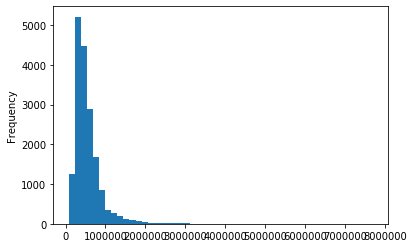

In [23]:
train['price'].plot.hist(bins=50)

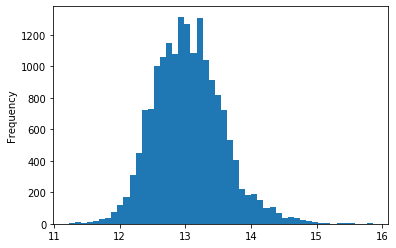

In [24]:
np.log(train['price']).plot.hist(bins=50)

In [25]:
train['price'] = np.log(train['price'])

In [26]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3787000140,20140901T000000,13.017003,3,2.25,1780,9969,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1934800078,20140930T000000,12.971540,2,2.25,1040,1516,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7331900290,20140731T000000,12.345835,4,1.50,1520,8800,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3438500798,20140715T000000,12.524526,3,1.50,1060,6954,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2697400020,20141031T000000,12.899220,3,2.00,1350,7216,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


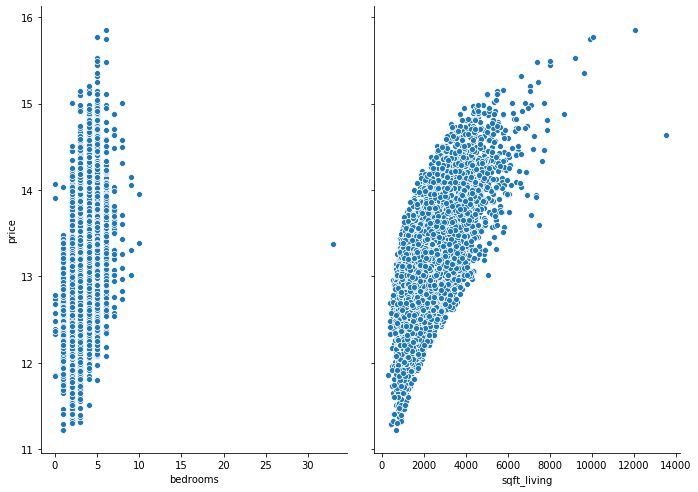

In [27]:
sns.pairplot(train, x_vars=['bedrooms','sqft_living'], y_vars='price', height=7, aspect=0.7)

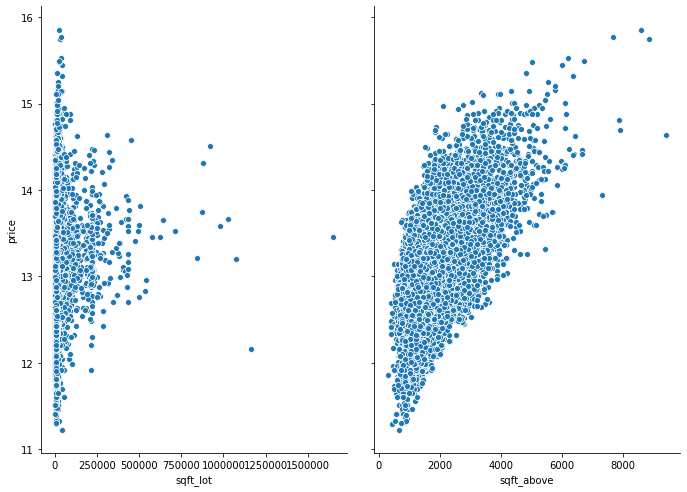

In [28]:
sns.pairplot(train, x_vars=['sqft_lot','sqft_above'], y_vars='price', height=7, aspect=0.7)

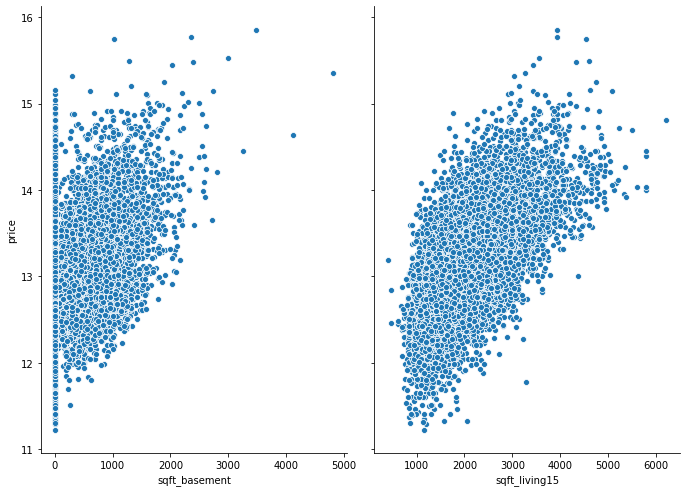

In [29]:
sns.pairplot(train, x_vars=['sqft_basement','sqft_living15'], y_vars='price', height=7, aspect=0.7)

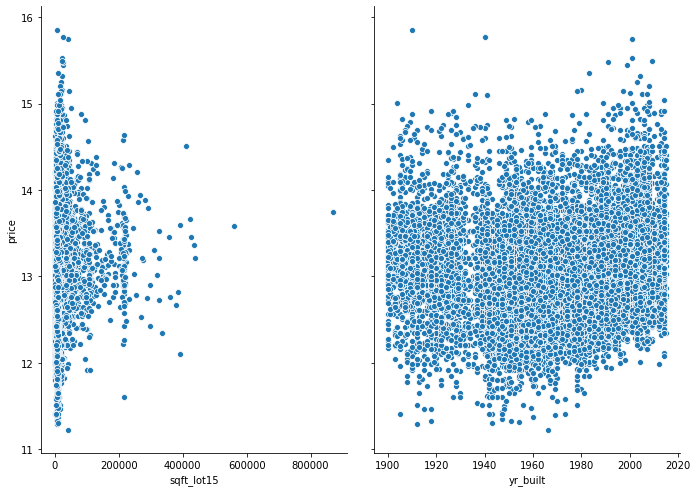

In [30]:
sns.pairplot(train, x_vars=['sqft_lot15','yr_built'], y_vars='price', height=7, aspect=0.7)

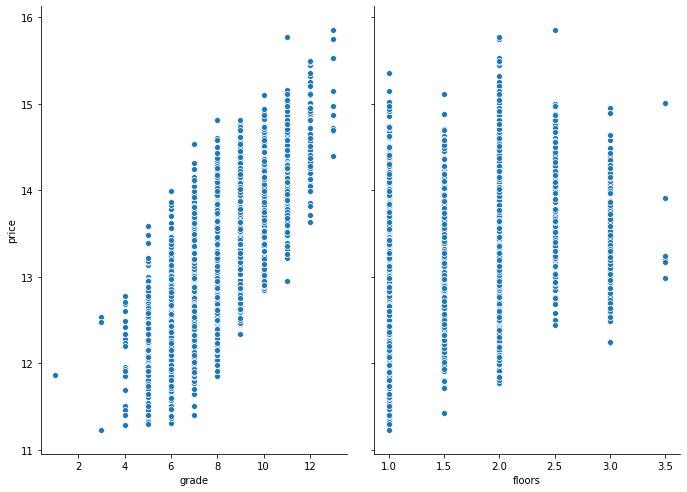

In [31]:
sns.pairplot(train, x_vars=['grade','floors'], y_vars='price', height=7, aspect=0.7)

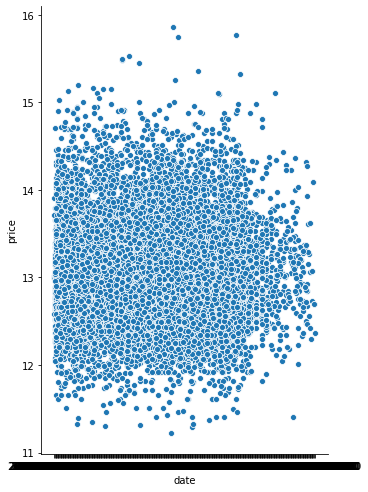

In [32]:
sns.pairplot(train, x_vars=['date'], y_vars='price', height=7, aspect=0.7)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17614 entries, 0 to 17613
Data columns (total 90 columns):
id               17614 non-null int64
date             17614 non-null object
price            17614 non-null float64
bedrooms         17614 non-null int64
bathrooms        17614 non-null float64
sqft_living      17614 non-null int64
sqft_lot         17614 non-null int64
floors           17614 non-null float64
waterfront       17614 non-null int64
view             17614 non-null int64
condition        17614 non-null int64
grade            17614 non-null int64
sqft_above       17614 non-null int64
sqft_basement    17614 non-null int64
yr_built         17614 non-null int64
yr_renovated     17614 non-null int64
lat              17614 non-null float64
long             17614 non-null float64
sqft_living15    17614 non-null int64
sqft_lot15       17614 non-null int64
zipcode_98001    17614 non-null uint8
zipcode_98002    17614 non-null uint8
zipcode_98003    17614 non-null uint8
zipcod

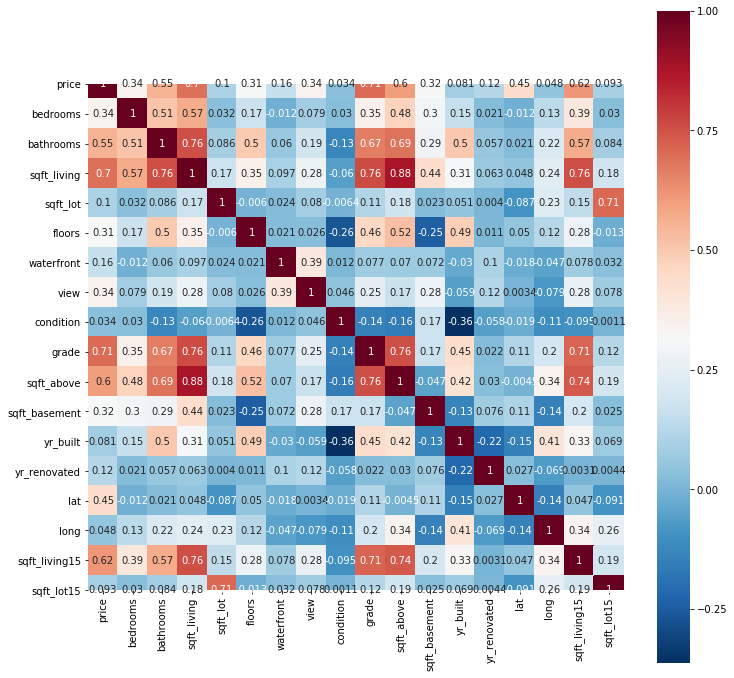

In [34]:
corr = train.select_dtypes(include=['object','float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, cmap='RdBu_r', vmax=1, annot=True, square=True)

In [35]:
type(corr)
corr.shape
corr.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.341897,0.552566,0.696099,0.100886,0.313060,0.161262,0.339847,0.034377,0.706800,0.604594,0.316698,0.080977,0.121149,0.445195,0.047966,0.617847,0.092664
bedrooms,0.341897,1.000000,0.512278,0.573340,0.031910,0.172597,-0.011966,0.079454,0.029542,0.354966,0.476808,0.300530,0.153643,0.021333,-0.011550,0.132590,0.390940,0.030169
bathrooms,0.552566,0.512278,1.000000,0.755548,0.086420,0.497440,0.060388,0.189705,-0.125313,0.668326,0.686820,0.286384,0.502865,0.056921,0.021096,0.219031,0.570884,0.083737
sqft_living,0.696099,0.573340,0.755548,1.000000,0.171193,0.351179,0.097491,0.281757,-0.059576,0.762879,0.877574,0.438032,0.312425,0.063258,0.047554,0.239872,0.757584,0.182292
sqft_lot,0.100886,0.031910,0.086420,0.171193,1.000000,-0.006030,0.023779,0.079517,-0.006446,0.113975,0.178216,0.022524,0.050903,0.004036,-0.086894,0.226051,0.147561,0.708385


In [36]:
cor_dict = corr['price'].to_dict()
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print('{0}: \t{1}'.format(*ele))

price: 	1.0
grade: 	0.7067996836559766
sqft_living: 	0.6960994595607799
sqft_living15: 	0.6178469694984771
sqft_above: 	0.6045939528884954
bathrooms: 	0.5525664762123221
lat: 	0.44519503802414406
bedrooms: 	0.34189687225537213
view: 	0.3398471701511413
sqft_basement: 	0.3166982535295523
floors: 	0.31305979350424434
waterfront: 	0.16126212240290166
yr_renovated: 	0.12114852802792667
sqft_lot: 	0.10088603324117652
sqft_lot15: 	0.09266424338998787
yr_built: 	0.08097667213987624
long: 	0.047966064881497045
condition: 	0.03437711079521789


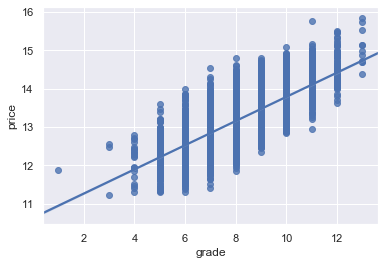

In [40]:
sns.set(color_codes=True)
sns.regplot(x = 'grade', y = 'price', data=train)

In [41]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3787000140,20140901T000000,13.017003,3,2.25,1780,9969,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1934800078,20140930T000000,12.971540,2,2.25,1040,1516,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7331900290,20140731T000000,12.345835,4,1.50,1520,8800,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3438500798,20140715T000000,12.524526,3,1.50,1060,6954,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2697400020,20141031T000000,12.899220,3,2.00,1350,7216,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
cols = list(train)
print(cols)

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 

In [43]:
cols.insert(1,cols.pop(cols.index('price')))
print(cols)

['id', 'price', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 

In [44]:
train = train.loc[:,cols]
train.head()

,id,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3787000140,13.017003,20140901T000000,3,2.25,1780,9969,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1934800078,12.971540,20140930T000000,2,2.25,1040,1516,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7331900290,12.345835,20140731T000000,4,1.50,1520,8800,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3438500798,12.524526,20140715T000000,3,1.50,1060,6954,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2697400020,12.899220,20141031T000000,3,2.00,1350,7216,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
train['date'] = train['date'].str.extract('(\d+)')
test['date'] = test['date'].str.extract('(\d+)')
train.head()

,id,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3787000140,13.017003,20140901,3,2.25,1780,9969,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1934800078,12.971540,20140930,2,2.25,1040,1516,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7331900290,12.345835,20140731,4,1.50,1520,8800,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3438500798,12.524526,20140715,3,1.50,1060,6954,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2697400020,12.899220,20141031,3,2.00,1350,7216,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
train['date'] = train['date'].astype(int)
test['date'] = test['date'].astype(int)
train.head()

,id,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3787000140,13.017003,20140901,3,2.25,1780,9969,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1934800078,12.971540,20140930,2,2.25,1040,1516,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7331900290,12.345835,20140731,4,1.50,1520,8800,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3438500798,12.524526,20140715,3,1.50,1060,6954,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2697400020,12.899220,20141031,3,2.00,1350,7216,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [47]:
train.describe()
train['date'].min()

20140502

In [48]:
train['date'] = train['date'].map(lambda x: x-20140502)
test['date'] = test['date'].map(lambda x:x-20140502)
train.head()

,id,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3787000140,13.017003,399,3,2.25,1780,9969,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1934800078,12.971540,428,2,2.25,1040,1516,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7331900290,12.345835,229,4,1.50,1520,8800,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3438500798,12.524526,213,3,1.50,1060,6954,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2697400020,12.899220,529,3,2.00,1350,7216,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


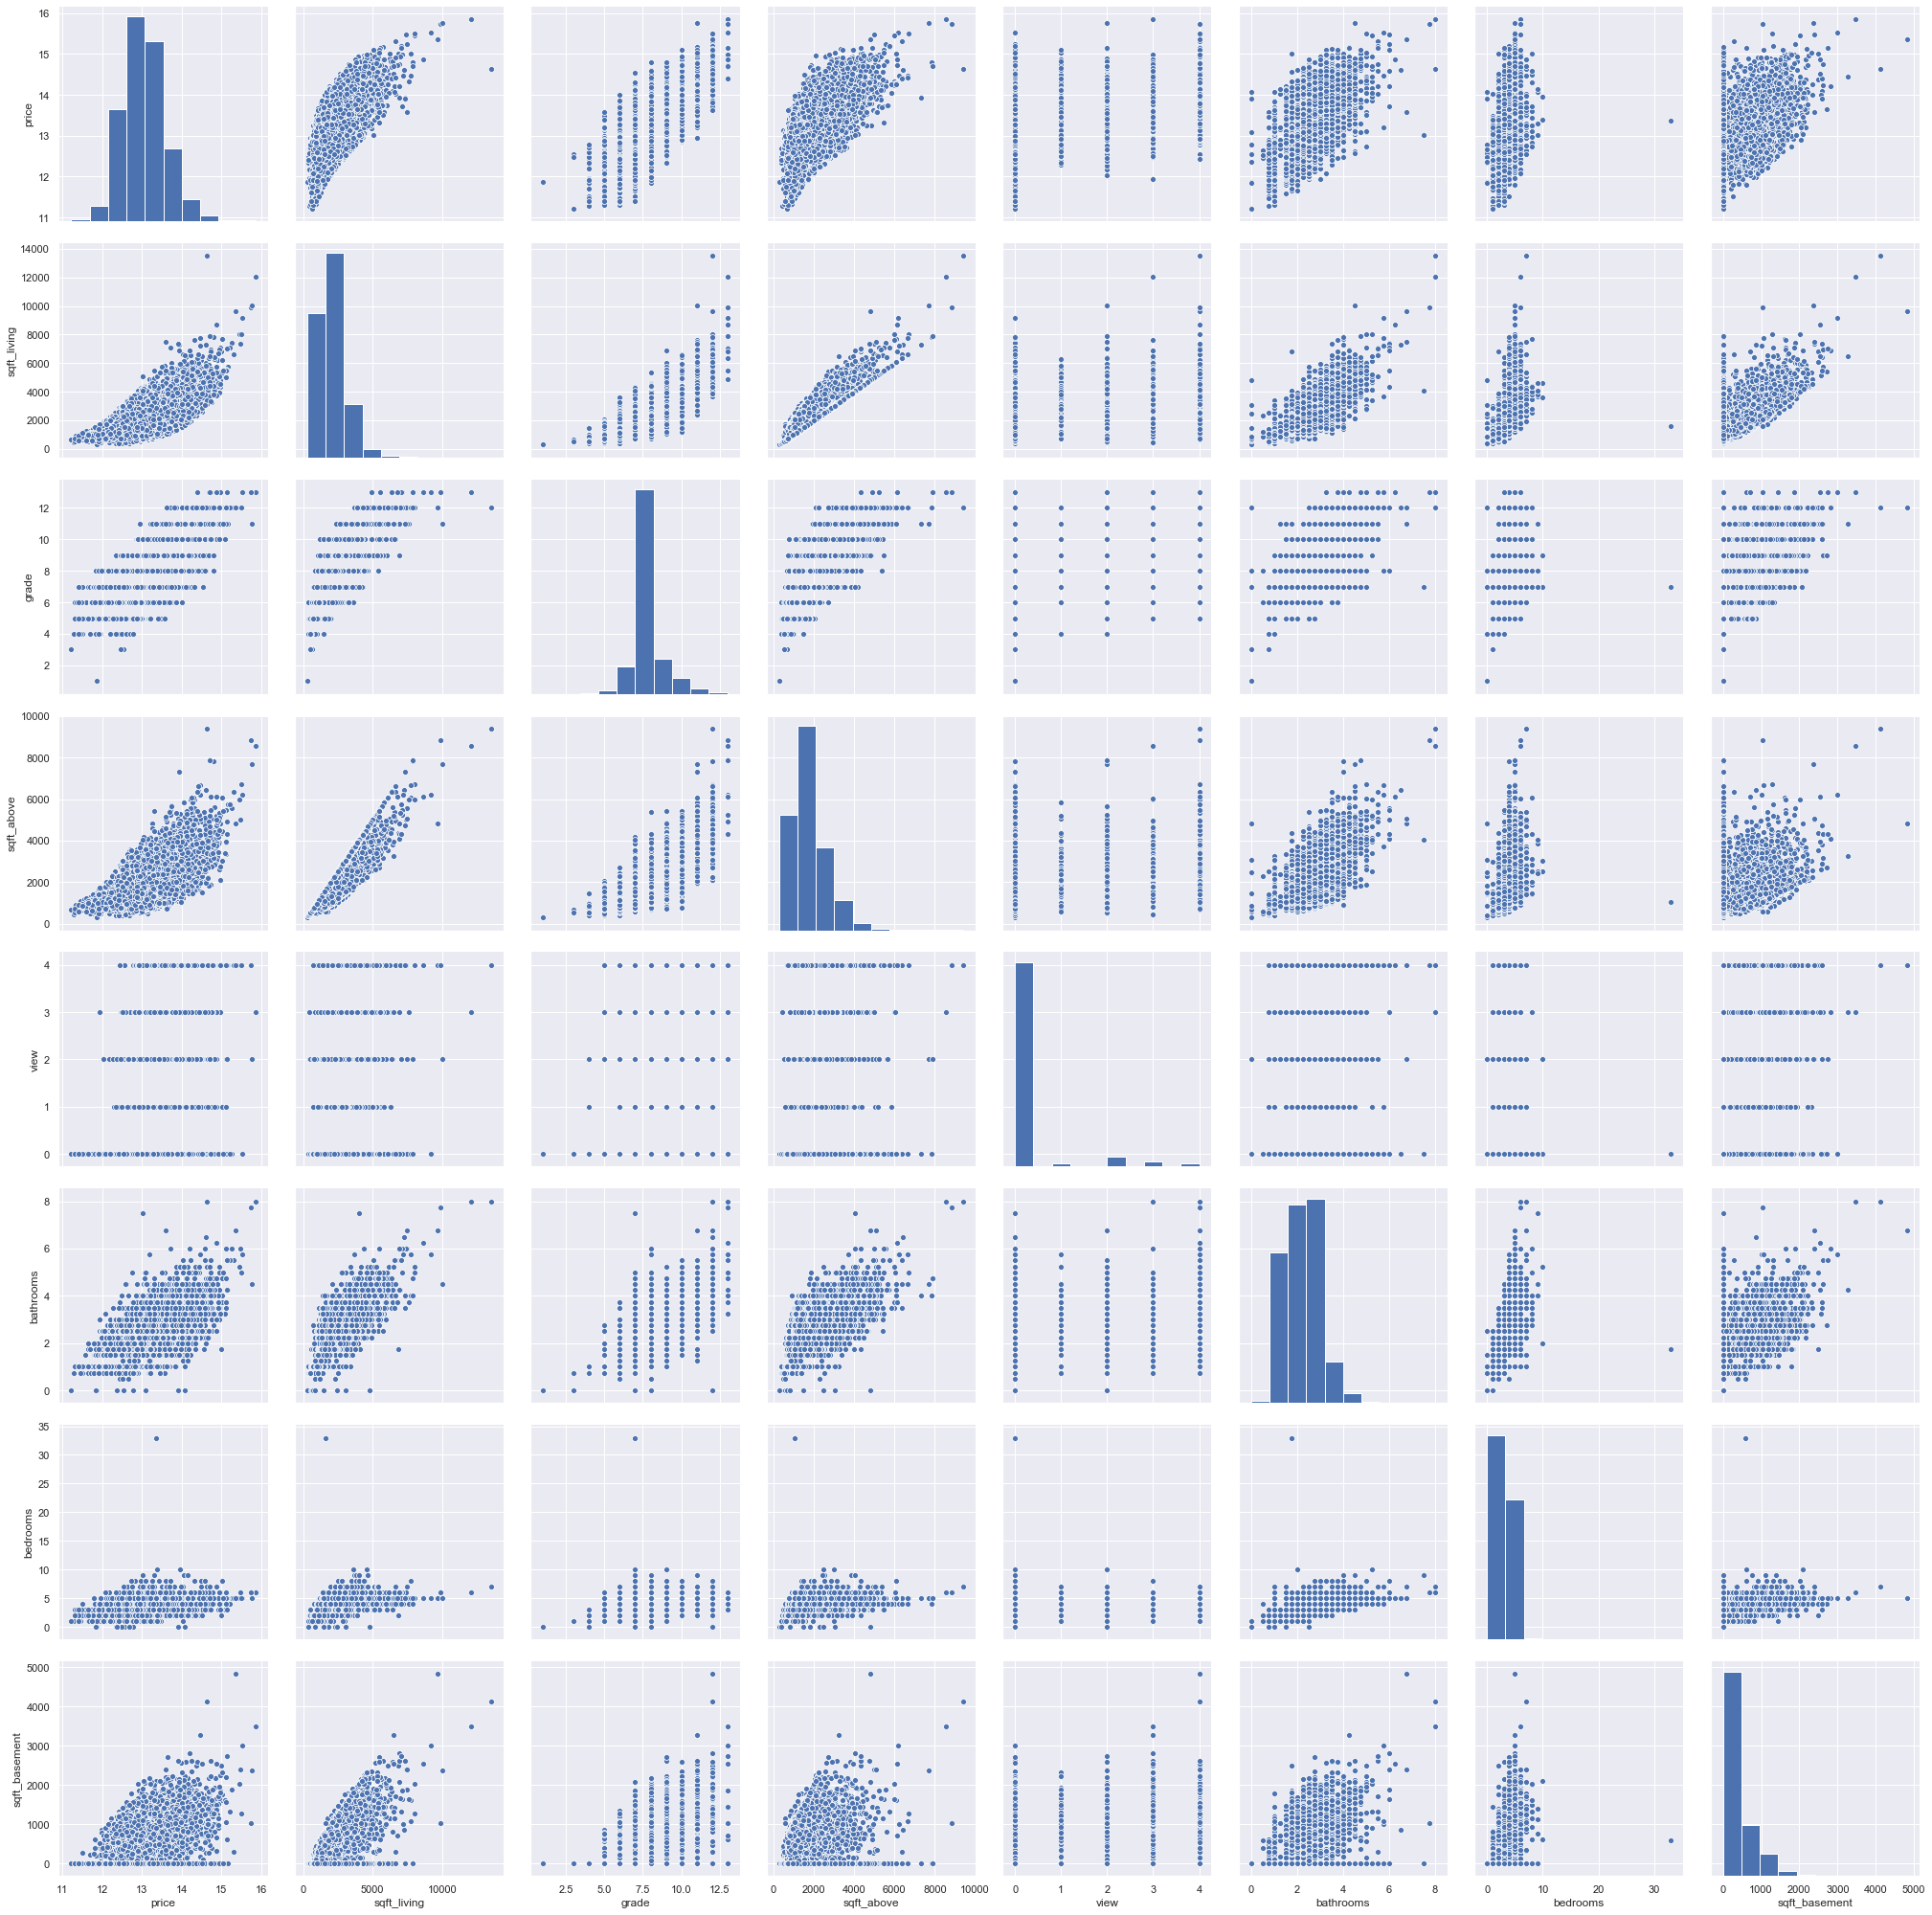

In [49]:
#Pairplots to visualize strong correlation
df_train=train.copy()
sns.set()
cols = ['price', 'sqft_living', 'grade', 'sqft_above', 'view', 'bathrooms','bedrooms','sqft_basement']
sns.pairplot(df_train[cols], height = 3.5)
plt.show();

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


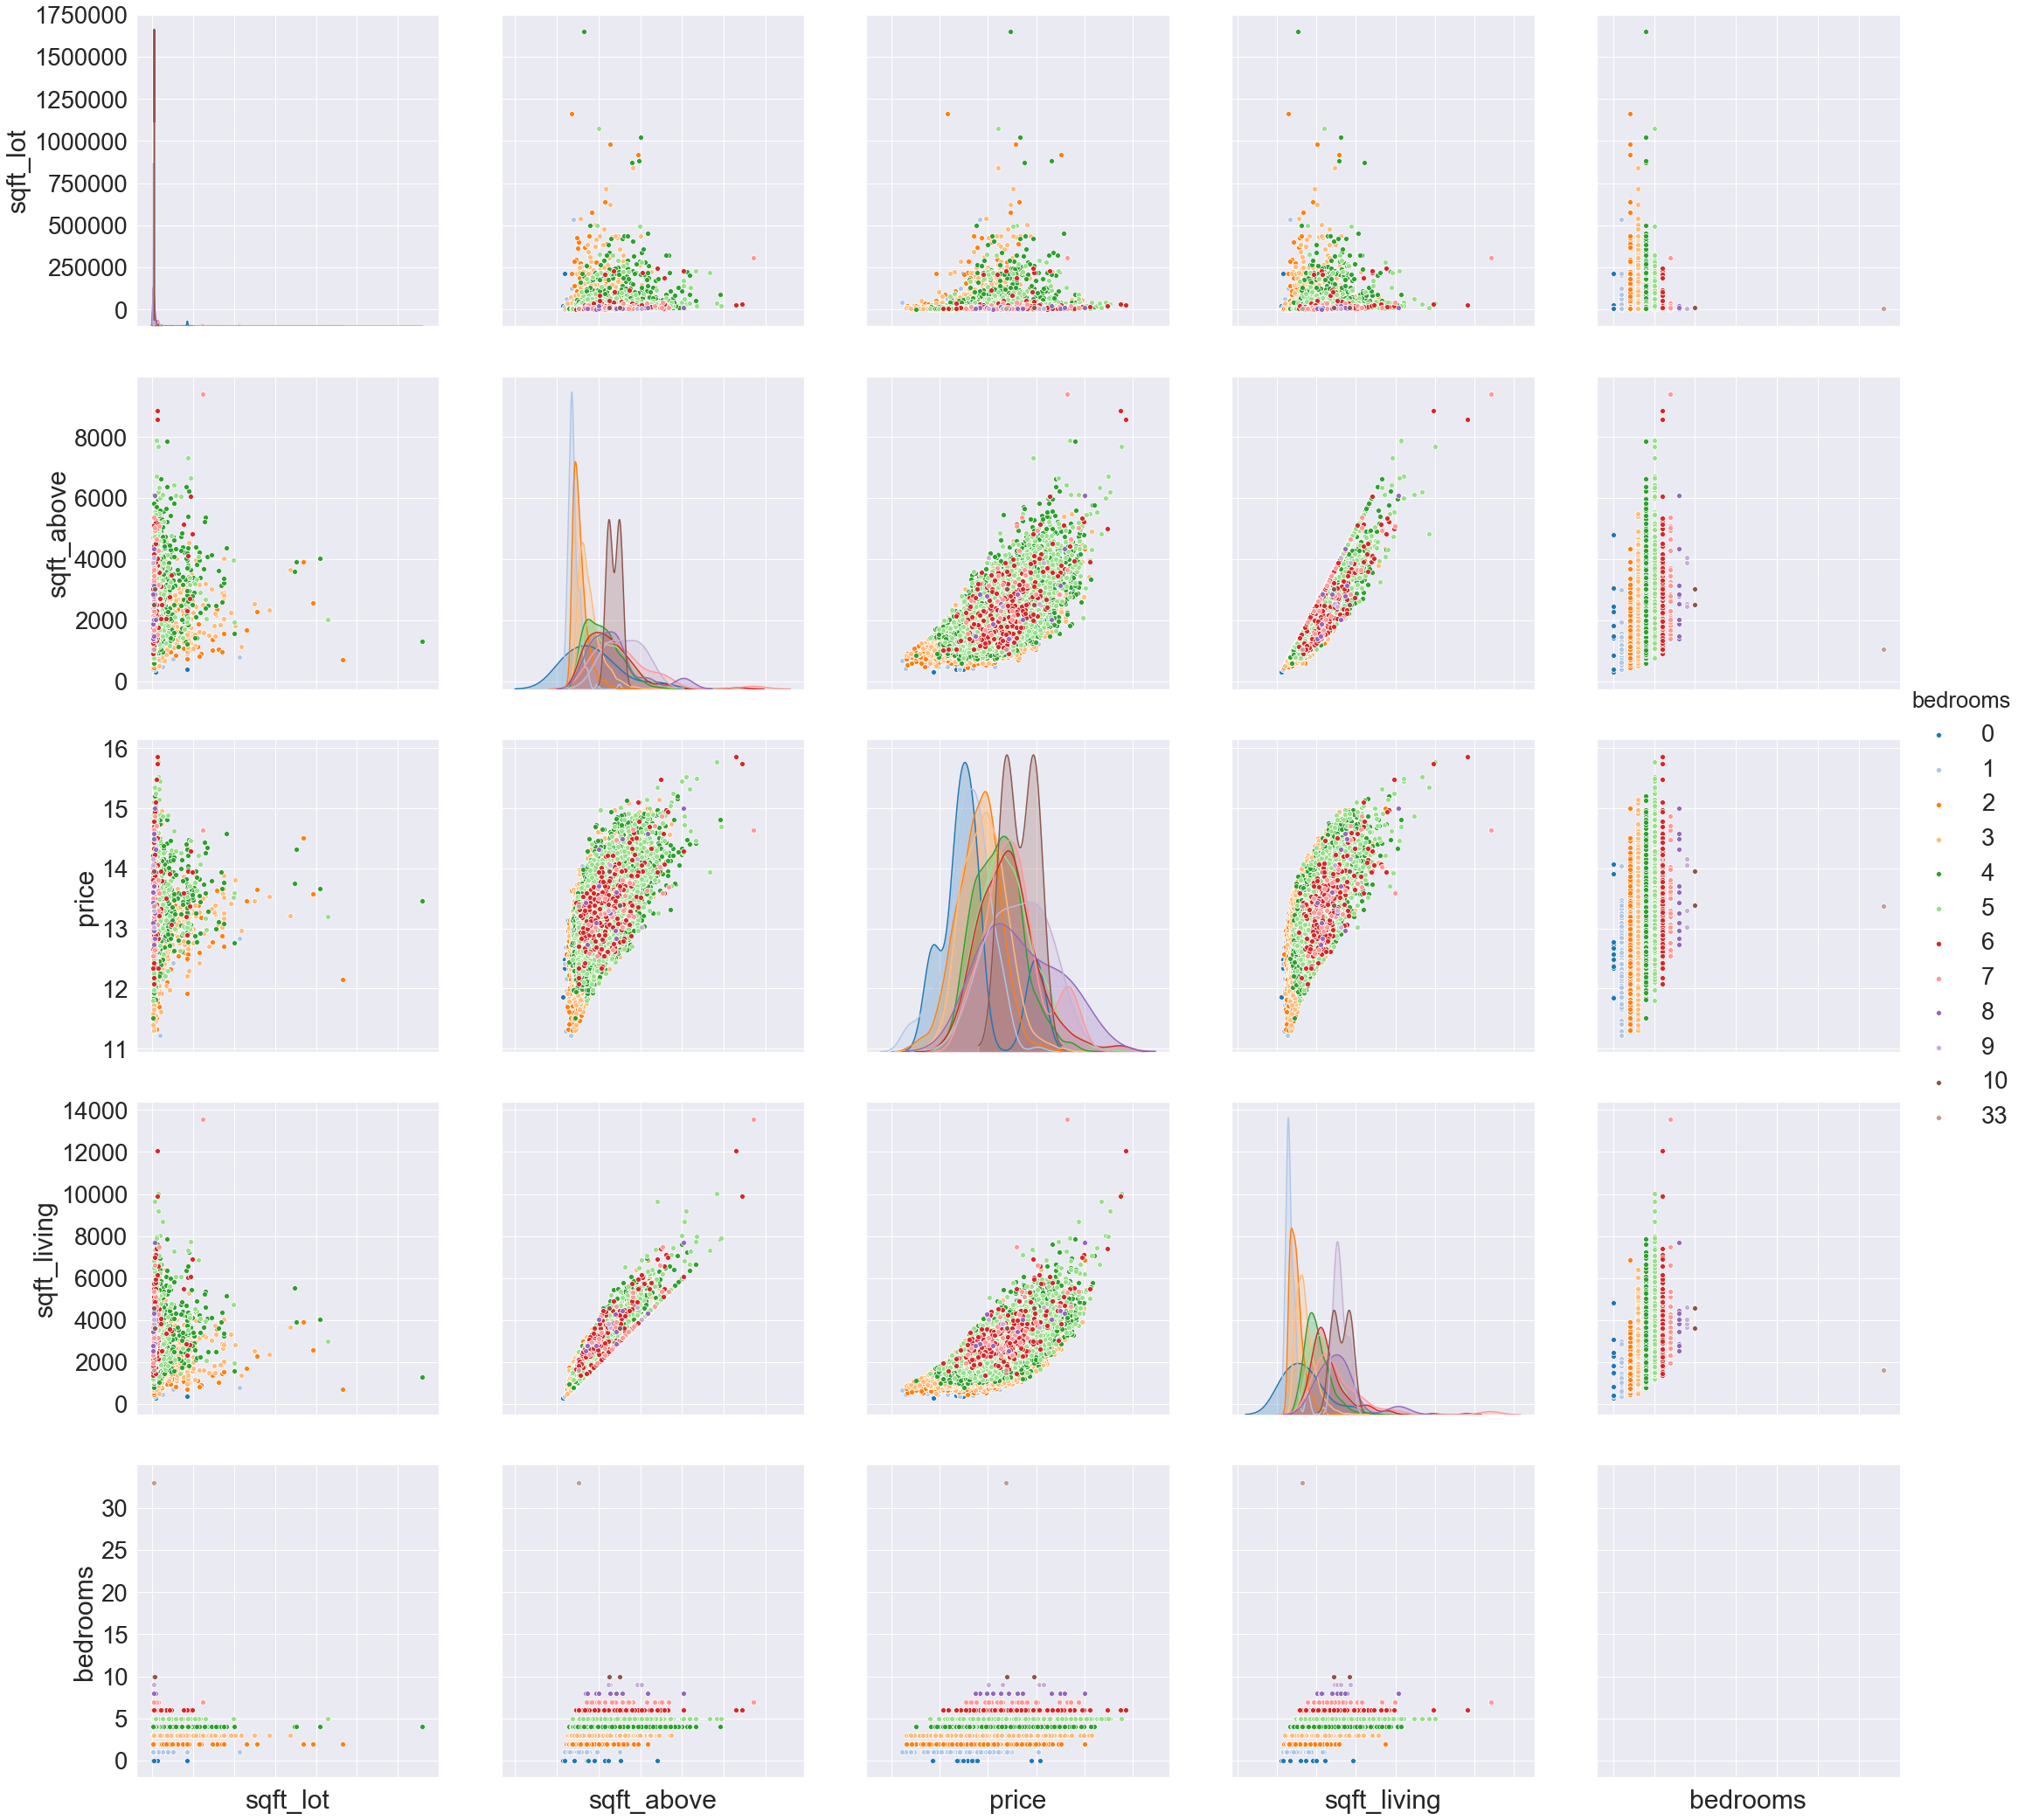

In [50]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(train[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[]);

Step 5: applying machine learning model 

In [51]:
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,6825100015,102,2,1.75,1500,6800,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,1698900195,400,3,2.00,1880,3000,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
2,2848700585,9922,1,1.00,810,5000,1.0,0,1,3,...,0,0,0,0,0,0,0,0,0,0
3,2597690050,9907,4,1.75,1770,7336,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,8944600200,121,3,2.50,1900,3255,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [52]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

# label = ['bedrooms', 'bathrooms', 'sqft_living',
#        'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
#        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
#        'lat', 'long', 'sqft_living15', 'sqft_lot15']

X_train = train.iloc[:,2:]
y_train = train['price']
X_test = test.iloc[:,2:]
# y_test = test['price']

test_data = test.iloc[:,2:]

[test_data.shape, X_train.shape]
# scaler = StandardScaler()
# X_train = scaler.fit_transform()

[(3999, 87), (17614, 88)]

In [53]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1486.
Date:                Fri, 08 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:09:36   Log-Likelihood:                 4926.9
No. Observations:               17614   AIC:                            -9680.
Df Residuals:                   17527   BIC:                            -9003.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -62.6828      7.772     -8.065

In [54]:
from sklearn import model_selection, metrics
from sklearn import svm, linear_model, ensemble, tree

# cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=0.3, train_size=0.7)

MLA = [
    # Linear Regression
    linear_model.LinearRegression(),
    linear_model.Lasso(),
    linear_model.Ridge(),
    
    # Tree
    tree.DecisionTreeRegressor(),
    
    # GBM
    ensemble.GradientBoostingRegressor()
]

col  = ['MLA_Name', 'MLA_RMSE', 'Train_score', 'Test_score']
MLA_compare = pd.DataFrame(columns=col)

i = 0
for alg in MLA:
    y_pred = model_selection.cross_val_predict(alg, X_train, y_train, cv=10)
    cv_res = model_selection.cross_validate(alg, X_train, y_train, cv=10)
    print(cv_res.keys())      
    
    MLA_compare.loc[i, 'MLA_Name'] = alg.__class__.__name__
    MLA_compare.loc[i, 'MLA_RMSE'] = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    MLA_compare.loc[i, 'Test_score'] = cv_res['test_score'].mean()
    
    i += 1

MLA_compare.sort_values(by=['MLA_RMSE'], ascending=True, inplace=True)
MLA_compare

dict_keys(['fit_time', 'score_time', 'test_score'])
dict_keys(['fit_time', 'score_time', 'test_score'])
dict_keys(['fit_time', 'score_time', 'test_score'])
dict_keys(['fit_time', 'score_time', 'test_score'])
dict_keys(['fit_time', 'score_time', 'test_score'])


,MLA_Name,MLA_RMSE,Train_score,Test_score
4,GradientBoostingRegressor,0.181921,NaN,0.880537
0,LinearRegression,0.184113,NaN,0.877541
2,Ridge,0.184127,NaN,0.877521
3,DecisionTreeRegressor,0.252253,NaN,0.775719
1,Lasso,0.360998,NaN,0.529487


Step 6: Best Model and Features

So, we have seen that GBoost's Test score is around 0.8805 and very less Mean squared error, RMSE showing 0.181894 for GBoost. Therefore, it is inferred that GBoost is the suitable model for this dataset.



In [55]:
GBM = ensemble.GradientBoostingRegressor()
# GBM = ensemble.RandomForestRegressor()

test_data = test.iloc[:,1:]
GBM.fit(X_train, y_train)
pred = GBM.predict(test_data)

submission = pd.DataFrame({'id': test['id'], 'prediction': np.exp(pred)})

Step 7: Data Output.

In [56]:
import os
os.getcwd() 

'/Users/justincheng0509/Documents/Data Sci'

In [57]:
submission.to_csv('submission3.csv', index=False)